# Assignment 8 - Web Mining
## Data Mining

by Ardian - 2106638173

April 27th, 2024

Information System - Faculty of Computer Science

Universitas Indonesia

---

## Libraries

In [5]:
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Data & Text Preprocessing

In [7]:
kompas_headings_raw = pd.read_excel('Dataset Publish 230424.xlsx')

kompas_headings_raw

,ID,title,urls
0,0,Benarkah Konsumsi Buah Bisa Mengecilkan Perut ...,https://www.kompas.com/tren/read/2024/04/08/21...
1,1,"Sejarah Mudik, Sudah Ada sejak Zaman Majapahit...",https://www.kompas.com/tren/read/2024/04/08/20...
2,2,Biaya kuliah Unimus 2024/2025 untuk Program Sa...,https://www.kompas.com/tren/read/2024/04/08/20...
3,3,"Modus Penipuan File APK Kembali Muncul, Kali I...",https://www.kompas.com/tren/read/2024/04/08/20...
4,4,"9 Hewan dengan Waktu Tidur Terlama di Dunia, A...",https://www.kompas.com/tren/read/2024/04/08/19...
...,...,...,...
110,143,Jam Buka dan Harga Tiket Masuk Dusun Semilir S...,https://www.kompas.com/tren/read/2024/04/12/10...
111,144,"7 Fakta Unik Merkurius, Planet Paling Kecil da...",https://www.kompas.com/tren/read/2024/04/12/09...
112,145,Harga Tiket dan Jam Buka Wahana Keranjang Sult...,https://www.kompas.com/tren/read/2024/04/12/08...
113,146,8 Tempat Wisata Gua di Yogyakarta untuk Habisk...,https://www.kompas.com/tren/read/2024/04/12/07...


### Restructure data frame:

In [8]:
kompas_headings = kompas_headings_raw.drop('urls', axis=1)
kompas_headings.set_index('ID', inplace=True)

kompas_headings

,title
ID,
0,Benarkah Konsumsi Buah Bisa Mengecilkan Perut ...
1,"Sejarah Mudik, Sudah Ada sejak Zaman Majapahit..."
2,Biaya kuliah Unimus 2024/2025 untuk Program Sa...
3,"Modus Penipuan File APK Kembali Muncul, Kali I..."
4,"9 Hewan dengan Waktu Tidur Terlama di Dunia, A..."
...,...
143,Jam Buka dan Harga Tiket Masuk Dusun Semilir S...
144,"7 Fakta Unik Merkurius, Planet Paling Kecil da..."
145,Harga Tiket dan Jam Buka Wahana Keranjang Sult...


### Lowercasing:

In [9]:
kompas_headings['title'] = kompas_headings['title'].str.lower()

kompas_headings

,title
ID,
0,benarkah konsumsi buah bisa mengecilkan perut ...
1,"sejarah mudik, sudah ada sejak zaman majapahit..."
2,biaya kuliah unimus 2024/2025 untuk program sa...
3,"modus penipuan file apk kembali muncul, kali i..."
4,"9 hewan dengan waktu tidur terlama di dunia, a..."
...,...
143,jam buka dan harga tiket masuk dusun semilir s...
144,"7 fakta unik merkurius, planet paling kecil da..."
145,harga tiket dan jam buka wahana keranjang sult...


### Remove numbers:

In [10]:
kompas_headings['title'] = kompas_headings['title'].str.replace(r'\d+', '', regex=True)

kompas_headings

,title
ID,
0,benarkah konsumsi buah bisa mengecilkan perut ...
1,"sejarah mudik, sudah ada sejak zaman majapahit..."
2,biaya kuliah unimus / untuk program sarjana
3,"modus penipuan file apk kembali muncul, kali i..."
4,"hewan dengan waktu tidur terlama di dunia, ad..."
...,...
143,jam buka dan harga tiket masuk dusun semilir s...
144,"fakta unik merkurius, planet paling kecil dan..."
145,harga tiket dan jam buka wahana keranjang sult...


### Remove punctuations:

In [11]:
kompas_headings['title'] = kompas_headings['title'].str.replace(r'[^\w\s]', '', regex=True)

kompas_headings

,title
ID,
0,benarkah konsumsi buah bisa mengecilkan perut ...
1,sejarah mudik sudah ada sejak zaman majapahit ...
2,biaya kuliah unimus untuk program sarjana
3,modus penipuan file apk kembali muncul kali in...
4,hewan dengan waktu tidur terlama di dunia ada...
...,...
143,jam buka dan harga tiket masuk dusun semilir s...
144,fakta unik merkurius planet paling kecil dan ...
145,harga tiket dan jam buka wahana keranjang sult...


### Stem words:

In [15]:
stemmer = StemmerFactory().create_stemmer()

kompas_headings['title'] = kompas_headings['title'].apply(stemmer.stem)

kompas_headings

,title
ID,
0,benar konsumsi buah bisa kecil perut buncit
1,sejarah mudik sudah ada sejak zaman majapahit ...
2,biaya kuliah unimus untuk program sarjana
3,modus tipu file apk kembali muncul kali ini su...
4,hewan dengan waktu tidur lama di dunia ada yan...
...,...
143,jam buka dan harga tiket masuk dusun milir sem...
144,fakta unik merkurius planet paling kecil dan m...
145,harga tiket dan jam buka wahana keranjang sult...


### Remove stop-words:

My stop-words file: https://drive.google.com/file/d/1p6d4nAk2kVQ1WI6TY6SDjeUC7fskE39_/view?usp=share_link

In [137]:
stopwords_file = '/content/drive/MyDrive/Data Science Resources/stop-words_bahasa.txt'
stopwords = []
with open(stopwords_file, "r", encoding="utf-8") as f:
    stopwords = [word.strip() for word in f]

def remove_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

kompas_headings['title'] = kompas_headings['title'].apply(lambda x: remove_stopwords(x, stopwords))

kompas_headings

,title
ID,
0,konsumsi buah perut buncit
1,sejarah mudik zaman majapahit populer lebaran
2,biaya kuliah unimus program sarjana
3,modus tipu file apk muncul kali surat phk kant...
4,hewan tidur dunia capai jam
...,...
143,jam buka harga tiket masuk dusun milir semaran...
144,fakta unik merkurius planet milik ekor
145,harga tiket jam buka wahana keranjang sultan l...


### Create document term matrix:

In [138]:
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(kompas_headings['title'])
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

dtm_df.index = kompas_headings_raw['ID']

dtm_df

,agenda,ahli,aidin,air,airlangga,aktor,alami,alas,aman,ancol,...,warga,way,waze,wilayah,will,wisata,yogyakarta,zakat,zaman,zoo
ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Model Fitting

### Find optimum k:
Using elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

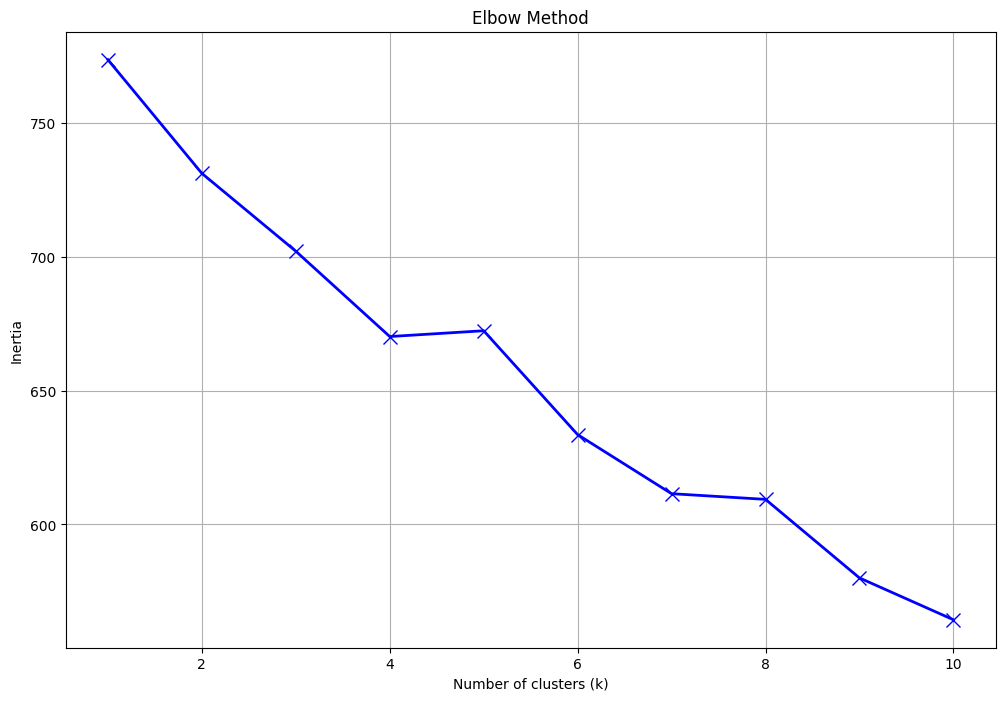

In [139]:
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(dtm_df)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(k_values, inertia_values, 'bx-', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

> The optimum k is 4

### Final model fitting:

In [140]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dtm_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

## Case Segmentation

In [141]:
headings_case_raw = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Mining by Universitas Indonesia/Assignment 8 - Web Mining Competition/Sample Case 230424.xlsx')

headings_case_raw

,ID,title,urls
0,23,Ramai soal Obyek Tak Dikenal Melintas di Atas ...,https://www.kompas.com/tren/read/2024/04/08/11...
1,25,Puncak Gerhana Matahari Total Bisa Dipantau Se...,https://www.kompas.com/tren/read/2024/04/08/10...
2,33,Link Live Streaming Gerhana Matahari Total 8 A...,https://www.kompas.com/tren/read/2024/04/08/07...
3,52,Gerhana Matahari Total 8 April 2024 Sudah Dibe...,https://www.kompas.com/tren/read/2024/04/09/17...
4,135,"5 Manfaat Tidur Pakai Kaus Kaki, Apa Saja?",https://www.kompas.com/tren/read/2024/04/12/18...
5,136,7 Air Rebusan untuk Menurunkan Kolesterol Saat...,https://www.kompas.com/tren/read/2024/04/12/17...
6,93,Apa yang Terjadi pada Tubuh jika Terlalu Banya...,https://www.kompas.com/tren/read/2024/04/10/14...
7,94,6 Cara Alami Turunkan Asam Urat Setelah Makan ...,https://www.kompas.com/tren/read/2024/04/10/13...
8,28,Lulusan Ma'had Aly Diperbolehkan Ikut Seleksi ...,https://www.kompas.com/tren/read/2024/04/08/09...
9,47,Bacaan Niat dan Tata Cara Lengkap Shalat Idul ...,https://www.kompas.com/tren/read/2024/04/09/18...


### Data preparation:

In [142]:
headings_case = headings_case_raw.drop('urls', axis=1)
headings_case.set_index('ID', inplace=True)
headings_case['title'] = headings_case['title'].str.lower()
headings_case['title'] = headings_case['title'].str.replace(r'\d+', '', regex=True)
headings_case['title'] = headings_case['title'].str.replace(r'[^\w\s]', '', regex=True)
headings_case['title'] = headings_case['title'].apply(stemmer.stem)
headings_case['title'] = headings_case['title'].apply(lambda x: remove_stopwords(x, stopwords))

dtm_case = vectorizer.fit_transform(headings_case['title'])
dtm_case_df = pd.DataFrame(dtm_case.toarray(), columns=vectorizer.get_feature_names_out())
dtm_case_df.index = headings_case_raw['ID']

missing_features = [col for col in dtm_df.columns if col not in dtm_case_df.columns]
for feature in missing_features:
    dtm_case_df[feature] = 0

unneeded_features = [col for col in dtm_case_df.columns if col not in dtm_df.columns]
dtm_case_df = dtm_case_df.drop(unneeded_features, axis=1)

dtm_case_df = dtm_case_df[dtm_df.columns]

dtm_case_df

<ipython-input-142-fe669a92f9f6>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dtm_case_df[feature] = 0
<ipython-input-142-fe669a92f9f6>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dtm_case_df[feature] = 0
<ipython-input-142-fe669a92f9f6>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dt

,agenda,ahli,aidin,air,airlangga,aktor,alami,alas,aman,ancol,...,warga,way,waze,wilayah,will,wisata,yogyakarta,zakat,zaman,zoo
ID,,,,,,,,,,,,,,,,,,,,,
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Final segmentation:

In [145]:
headings_case['Cluster'] = kmeans.predict(dtm_case_df)

headings_case

,title,Cluster
ID,,
23,ramai obyek kenal lintas gunung rapi,1
25,puncak gerhana matahari total pantau selasa wib,1
33,link live streaming gerhana matahari total april,1
52,gerhana matahari total april berita pakar astr...,1
135,manfaat tidur pakai kaus kaki,1
136,air rebus turun kolesterol lebaran,3
93,tubuh makan nastar,1
94,alami turun asam urat makan emping melinjo,1
28,lulus mahad aly seleksi cpns,1


### Save predictions:

In [146]:
headings_case['Cluster'].to_csv("Assignment8_2106638173_Ardian.csv")